# 05: NumPy

This notebook demonstrates how to import and use the Numpy module to work with arrays. The NumPy library includes (among other things) ways of storing and manipulating data that are more efficient than standard Python arrays. Using NumPy with numerical data is much faster than using Python lists or tuples.

### Important Note
The data structures and functionality of numpy underly many of the more advanced python tools that we will use including scipy, matplotlib, pandas, geopandas, flopy, and more.

### References
[Numpy documentation](https://docs.scipy.org/doc/)  
The [Scipy lecture notes](http://scipy-lectures.org/intro/numpy/index.html) provide a pretty comprehensive demo of the core features of numpy.



### Outline
* Loading Numpy
* Creating a Numpy Array
* Array Operations
* Accessing Array Elements
* Reshaping and Stacking Arrays
* Record Arrays


In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

#this line sets up the directory paths that we will be using
datapath = Path('data/numpy/')
print('Data will be loaded from the following directory: ', datapath)

Data will be loaded from the following directory:  data/numpy


## Importing Numpy
The first step is to import the numpy module.  It's not a requirement, but almost a requirement to rename it as `np` as part of the import statement as follows.

Note that at any time, you can enter the name of an object or method and the "?" to see help.  Also remember that shift-tab will bring help.

In [2]:
import numpy as np

Many packages, including Numpy, have a `__version__` attribute.  It is a good idea to be aware of what package version you are using.

In [3]:
#To see the version of numpy that was loaded, enter the following command
print('I am running numpy version: ', np.__version__)

I am running numpy version:  2.3.3


## Numpy Arrays
***

Numpy `array` objects (also called ndarray) are the cental data structure for `numpy`. Let's check out how to make arrays:
1. Convert a list or tuple into an array
2. Use a numpy function
3. Read from a file

### Creating a Numpy Array from a List
The following is an example of converting a list into a numpy array using the numpy [array](http://wiki.scipy.org/Numpy_Example_List#array) function.

In [4]:
#create a new list
lst = [1, 3, 5, 7]

#convert the list into a new array
a = np.array(lst)

#print some information about the new array
print('The array is: ', a)
print('The type of an array is: ', type(a))

The array is:  [1 3 5 7]
The type of an array is:  <class 'numpy.ndarray'>


Note that the following does not work.  Brackets are required so that the input is a list.

```python
a = np.array(1, 2, 3)
```

Every array contains additional information that is stored as an attribute as part of the array.  These attributes include the dimension (ndim) and the array shape (shape), for example.

In [5]:
print('The number of dimensions for a: ', a.ndim)

The number of dimensions for a:  1


In [6]:
print('The shape of a: ', a.shape)

The shape of a:  (4,)


In [7]:
print('The type of a: ', a.dtype)

The type of a:  int64


A two-dimensional array can be created by providing two lists within brackets to the numpy array function.

In [8]:
#create a new list
lst1 = [1, 3, 5, 7]
lst2 = [9, 12, 14, 32]

#convert the list into a new array
a = np.array([lst1, lst2])

#print some information about the new array
print('The array is: ')
print(a)
print('The type of the array is: ', type(a))
print('The dimension of the array is: ', a.ndim)
print('The shape of the array is: ', a.shape)

The array is: 
[[ 1  3  5  7]
 [ 9 12 14 32]]
The type of the array is:  <class 'numpy.ndarray'>
The dimension of the array is:  2
The shape of the array is:  (2, 4)


We could also skip the step of creating two lists and just put them right into the `np.array` function as follows.

In [9]:
np.array([[1, 3, 5, 7],[9, 12, 14, 32]])

array([[ 1,  3,  5,  7],
       [ 9, 12, 14, 32]])

## Array Generating Functions

There are many different functions for creating numpy arrays.  They are described [here](http://docs.scipy.org/doc/numpy/reference/routines.array-creation.html).  

Here are a few common array generating functions with links to their descriptions:

* [empty](https://numpy.org/doc/stable/reference/generated/numpy.empty.html#numpy.empty)
* [zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy.zeros)
* [full](https://numpy.org/doc/stable/reference/generated/numpy.full.html#numpy.full)
* [ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html#numpy.ones)
* [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange)
* [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace)

empty, zeros, and ones will all create a new array, and they all have the same syntax.  The only difference is the value that will be assigned to all of the array elements upon initialization.  The syntax for creating an empty array is:

    a = np.empty( (shape), dtype )


In [10]:
# Create an empty array
print(np.empty((2,2), dtype=int))

[[1 3]
 [5 7]]


You are probably asking, what is this junk?  When you use `np.empty`, the only guarantee is that none of the values will be initialized.  You'll get whatever garbage was in that memory address.  You will only want to use `np.empty` if you know that you will be filling the array with meaningful values.

The `dtype` is the type of array to create.  Some common examples are `int` (INTEGER), `float` (a floating point, or REAL for you FORTRAN people).  Numpy also has some of its own, like `np.int32`, `np.int64`, `np.float32`, `np.float64`, etc. if you want to specify resolution

Here is an empty float array.

In [11]:
a = np.empty((3,3), dtype=float)
print(a)

[[4.66476132e-310 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000]]


As you might expect, `np.zeros` and `np.ones` make arrays with values initialized one zero and one, respectively.

In [12]:
print(np.ones((3,3,3), int))
print(np.zeros((2,2,2), float))

[[[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]]]
[[[0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]]]


## Input and Output

Numpy has a great set of tools for saving arrays to files and reading arrays from files.  Details on these tools are [here](http://docs.scipy.org/doc/numpy/reference/routines.io.html).

The following are the common ones:

* [loadtxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt)
* [savetxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html#numpy.savetxt)

We will now test these functions using data in the `data` directory.  In this folder, there is a file called `mt_st_helens_before.dat`.  This file is a simple text array with a grid of elevations for Mt. St Helens prior to the 1980 eruption.  We can read this array using the `loadtxt` function as follows.

In [13]:
before = np.loadtxt(datapath / 'mt_st_helens_before.dat', dtype=np.float32)
print(before.shape, before.dtype)

(466, 327) float32


We can very quickly plot a two-dimensional numpy array using the `imshow` function from `matplotlib`. Spoiler alert: we will talk about `matplotlib` a bunch later.

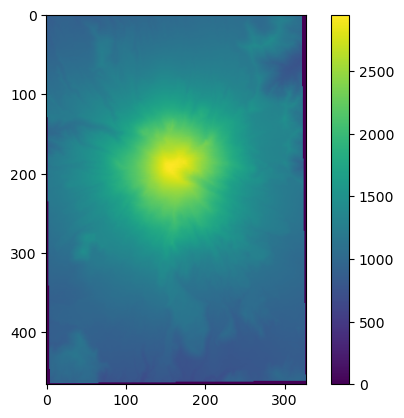

In [14]:
plt.imshow(before)
plt.colorbar()

## TEST YOUR SKILLS #0

1. Write the Mt. St. Helens array (before) to a new file called `mynewarray.dat` in the same folder as `mt_st_helens_before.dat`. Explore different formats (see the note under [documentation](https://numpy.org/doc/stable/reference/generated/numpy.savetxt.html) for more) and see if you can read it back in again. What are the file size ramifications of format choices?
2. Take a look at `bottom_commented.dat` in a text editor.  What about this file?  Can you read this file using `loadtxt` without having to manually change the file?  Hint: look at the `loadtxt` arguments.

In [15]:
#Skill Test 0.0
#use np.savetxt here to write before to mynewarray.dat in the same folder (datapath). 
# What other options are there? What are some advantages/disadvantages?


In [16]:
#Skill Test 0.1

filename = datapath / 'bottom_commented.dat'

# fill this in
#bot2 = 
#print bot2.shape, bot2.dtype

## Array Operations
***
It is very easy to perform arithmetic operations on arrays. So we can easily add and subtract arrays and use them in `numpy` functions. 
>pro tip: These operations, generally, are _element-wise_ -- so, don't expect matrix maths to be the result. That comes later...

In [17]:
#add
a = np.ones((100, 100))
a = a + 1
print(a)

#powers, division
a = a ** 2.73 / 75
print(a)

[[2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]
 [2. 2. 2. ... 2. 2. 2.]]
[[0.08846075 0.08846075 0.08846075 ... 0.08846075 0.08846075 0.08846075]
 [0.08846075 0.08846075 0.08846075 ... 0.08846075 0.08846075 0.08846075]
 [0.08846075 0.08846075 0.08846075 ... 0.08846075 0.08846075 0.08846075]
 ...
 [0.08846075 0.08846075 0.08846075 ... 0.08846075 0.08846075 0.08846075]
 [0.08846075 0.08846075 0.08846075 ... 0.08846075 0.08846075 0.08846075]
 [0.08846075 0.08846075 0.08846075 ... 0.08846075 0.08846075 0.08846075]]


### remember the behavior of lists?

In [18]:
a = [1,2,3,4]
a*2

[1, 2, 3, 4, 1, 2, 3, 4]

In [19]:
a = np.array(a)
a*2

array([2, 4, 6, 8])

### Lists are general, but `numpy` is for the maths ...

### There is so much you can do with numpy arrays and the available functions.  For a list of the mathematical functions look [here](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

In [20]:
#or how about a sin function
x = np.linspace(0, 2*np.pi)
y = np.sin(x)
print(x, y)

[0.         0.12822827 0.25645654 0.38468481 0.51291309 0.64114136
 0.76936963 0.8975979  1.02582617 1.15405444 1.28228272 1.41051099
 1.53873926 1.66696753 1.7951958  1.92342407 2.05165235 2.17988062
 2.30810889 2.43633716 2.56456543 2.6927937  2.82102197 2.94925025
 3.07747852 3.20570679 3.33393506 3.46216333 3.5903916  3.71861988
 3.84684815 3.97507642 4.10330469 4.23153296 4.35976123 4.48798951
 4.61621778 4.74444605 4.87267432 5.00090259 5.12913086 5.25735913
 5.38558741 5.51381568 5.64204395 5.77027222 5.89850049 6.02672876
 6.15495704 6.28318531] [ 0.00000000e+00  1.27877162e-01  2.53654584e-01  3.75267005e-01
  4.90717552e-01  5.98110530e-01  6.95682551e-01  7.81831482e-01
  8.55142763e-01  9.14412623e-01  9.58667853e-01  9.87181783e-01
  9.99486216e-01  9.95379113e-01  9.74927912e-01  9.38468422e-01
  8.86599306e-01  8.20172255e-01  7.40277997e-01  6.48228395e-01
  5.45534901e-01  4.33883739e-01  3.15108218e-01  1.91158629e-01
  6.40702200e-02 -6.40702200e-02 -1.91158629e-01 -

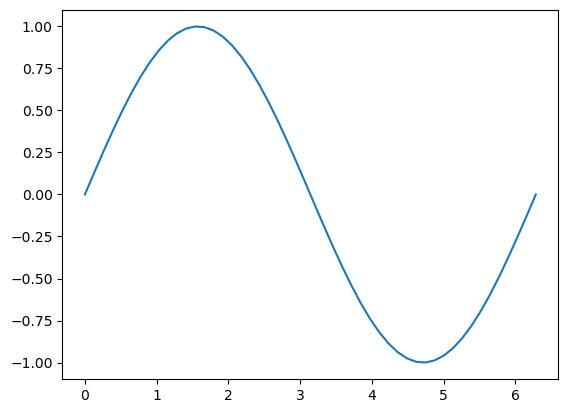

In [21]:
# An x, y plot can be quickly generated using plt.plot()
plt.plot(x, y)

## Accessing Array Elements

Okay, now for the good stuff...

Numpy arrays are zero based, which means the first position is referenced as 0.  If you are a FORTRAN person or a MATLAB person, THIS WILL CAUSE YOU GREAT GRIEF!  You will be burned by the fact that the first element in an array is not `a[1]`.  It is `a[0]`.  You will accept it, eventually, and then you will find zero-based arrays to be more intuitive, maybe.

Let's do some array slicing to see how all of this works.

In [22]:
#create an array with 10 equally spaced values
a = np.linspace(50, 60, 10)
print(a)

[50.         51.11111111 52.22222222 53.33333333 54.44444444 55.55555556
 56.66666667 57.77777778 58.88888889 60.        ]


In [23]:
#we can access the first value as
print('The first value is: ', a[0])

#the last value is
print('The last value is: ', a[9])

The first value is:  50.0
The last value is:  60.0


Okay, this is all good. Now there is another cool part of numpy arrays, and that is that we can use negative index numbers.  So instead of a[9], we could also say a[-1].

In [24]:
print('The last value is: ', a[-1])

#hmm.  Does that mean?  yup.
print('The second to last value is: ', a[-2])

The last value is:  60.0
The second to last value is:  58.888888888888886


### Accessing Parts of an Array

So how do we access parts of an array?  The formal syntax for a one dimensional array is:

    array[idxstart : idxstop : idxstride]
    
where idxstart is the zero-based array position to start; idxstop is the zero-based index to go up to, BUT NOT INCLUDE, and idxstride is the number of values to skip.  The following are valid array slides:

    a[:]    #all elements
    a[0:-1] #all elements
    a[2:10] #elements in the third position up to elements in the 10th position
    a[::2]  #start in position 0 and include every other element
    a[::-1] #start at the end and reverse the order

The following are some examples.


In [25]:
#make a fresh array with 30 values
a = np.arange(30)
print('a=', a)

#print values from the beginning up to but not including the 10th value
print('a[:10]: ', a[:10])

#or print the values from position 20 to the end
print('a[20:]', a[20:])

a= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
a[:10]:  [0 1 2 3 4 5 6 7 8 9]
a[20:] [20 21 22 23 24 25 26 27 28 29]


This is all good, but what if want to skip over values.  Then we can also enter a stride. 

In [26]:
# Print every second value
print(a[::2])

[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]


In [27]:
# Print every 5th value from 5 to 25
print(a[5::5])

[ 5 10 15 20 25]


**Note** the slice notation `5::5` above is actually shorthand for the built-in slice object

In [28]:
a[slice(10, None, 5)]

array([10, 15, 20, 25])

And this all works for multi-dimensional arrays as well.  So we can access parts of a multi-dimensional array, just separate the slice commands with a `','`

In [29]:
a = np.ones((10, 10), dtype=int)
print(a)

[[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


In [30]:
#now lets set the upper left quadrant of a to 2
a[:5, :5] = 2
print(a)

[[2 2 2 2 2 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1]
 [2 2 2 2 2 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]]


### Accessing Array Elements Using an Index List or Array

If we know the array indices that we want to access, we can specify them in a list and pass that list to the array through the brackets.

In [31]:
a = np.random.random(10)
print(a)
print('values in 2, 3, and 7 positions', a[[2, 3, 7]])

[0.21028618 0.68414625 0.0768631  0.07069673 0.88915723 0.14497472
 0.92223552 0.40899217 0.54344932 0.73547854]
values in 2, 3, and 7 positions [0.0768631  0.07069673 0.40899217]


In [32]:
#this also works for multi dimensions
icoord = np.arange(10)
jcoord = icoord
a = np.zeros((10, 10), dtype='int')
a[icoord, jcoord] = 1
print(a)  #hey, its the identity matrix!

#what do you think?  Do you think numpy has an identity function?

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]


In [33]:
np.eye(10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

### Boolean indexing
conditional statements can also be used to slice arrays
what if we want to identify nodata in the Mt. St. Helens array, which have a value of 0, and convert them to nodata?

In [34]:
before

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [867., 872., 881., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]],
      shape=(466, 327), dtype=float32)

### comparing arrays

[Value Comparisons](https://docs.python.org/3.9/reference/expressions.html?highlight=bitwise#value-comparisons) yield Boolean True/False results and include `==`,`<`,`<=`,`>=`,`!=` (the last being "not equal")

In [35]:
before==0 

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], shape=(466, 327))

In [36]:
before != 0

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], shape=(466, 327))

In [37]:
# use a Boolean result to operate on an array
before[before == 0] = np.nan

In [38]:
before

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [867., 872., 881., ...,  nan,  nan,  nan],
       ...,
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]],
      shape=(466, 327), dtype=float32)

or, what if we want to identify cells with elevations above 2000 meters?
`before > 2000` returns `True` for each position in the array that meets this condition (yellow in plot below), `False` everywhere else (purple)

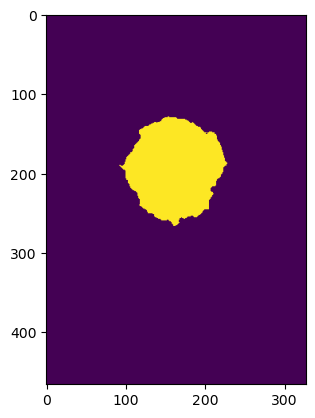

In [39]:
plt.imshow(before > 2000)

### this can be applied, element-by-element to entire arrays

In [40]:
a = np.random.random((5,5))
b = a.copy()
c = b.copy() 
c[0,0] = 99 # tweak a single entry in c

In [41]:
a==b

array([[ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [42]:
b==c

array([[False,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True]])

In [43]:
# are they the same shape and have all the same values
np.array_equal(a, b), np.array_equal(b,c)

(True, False)

### Logical operations: `any` and `all`

In [44]:
np.any(a==c), np.all(a==c)

(np.True_, np.False_)

### [Bitwise operations](https://docs.python.org/3.9/reference/expressions.html?highlight=bitwise#binary-bitwise-operations) are required to compare Boolean (and other binary) arrays and include "and" `&` and "or" `|`. 

In [45]:
# compare two binary arrays
a=np.random.random((5,5))
little = a<.2
big = a>.6

In [46]:
little

array([[False, False,  True, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False,  True],
       [False, False, False, False, False]])

In [47]:
big

array([[False,  True, False,  True,  True],
       [ True,  True, False,  True,  True],
       [False,  True, False,  True, False],
       [False,  True,  True,  True, False],
       [ True,  True,  True, False, False]])

In [48]:
little & big # can't be both, right?

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False]])

In [49]:
little | big

array([[False,  True,  True,  True,  True],
       [ True,  True, False,  True,  True],
       [False,  True, False,  True, False],
       [False,  True,  True,  True,  True],
       [ True,  True,  True, False, False]])

In [50]:
a[little | big] = 0
a

array([[0.21883007, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.57493305, 0.        , 0.        ],
       [0.4363177 , 0.        , 0.39728144, 0.        , 0.46601159],
       [0.22018982, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.24900755, 0.49407638]])

>pro tip: If you stack the comparison together with bitwise comparisons, you need to wrap those in (). This may seem abstract but will be important soon. Like really soon.

In [51]:
a[(a>.3) & (a<.5)] = 9
a

array([[0.21883007, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.57493305, 0.        , 0.        ],
       [9.        , 0.        , 9.        , 0.        , 9.        ],
       [0.22018982, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.24900755, 9.        ]])

### there are times when it's useful to have a list of indices meeting some condition. [`np.where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) will hook you up. (also check out [`nonzero`](https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html) and [`argwhere`](https://numpy.org/doc/stable/reference/generated/numpy.argwhere.html) for some nuanced options)

In [52]:
a = np.random.random((3,3))
a

array([[0.99733573, 0.54971997, 0.94604118],
       [0.75425439, 0.08113507, 0.38400077],
       [0.59823518, 0.291229  , 0.12287402]])

In [53]:
idx = np.where(a<0.5)
idx

(array([1, 1, 2, 2]), array([1, 2, 1, 2]))

In [54]:
a

array([[0.99733573, 0.54971997, 0.94604118],
       [0.75425439, 0.08113507, 0.38400077],
       [0.59823518, 0.291229  , 0.12287402]])

In [55]:
a[idx]

array([0.08113507, 0.38400077, 0.291229  , 0.12287402])

## TEST YOUR SKILLS #1
Let's calculate the amount of material lost from Mt. St. Helens in the 1980 eruption. We have the before and after elevation arrays in the data folder noted in the next cell. We will need to load them up. 
- The before and after files are the same dimensions, but they have some zeros around the edges indicating "nodata" values. 
- Check to see - are the zeros in the same place in both arrays? (`np.where` and friends can help with that). 
- If there are no-data zeros in one array at a different location than the other array, what happens if you look at the difference?
- assume each pixel is 25 x 25 feet and the elevation arrays are provided in meters to calculate a volumetric difference between before and after arrays.

In [56]:
before_file = datapath / 'mt_st_helens_before.dat'
after_file = datapath / 'mt_st_helens_after.dat'

## Views vs. Copies
***
**Slice indexing returns a view** That means if you change the slice, you change the original 🤔 

In [57]:
a

array([[0.99733573, 0.54971997, 0.94604118],
       [0.75425439, 0.08113507, 0.38400077],
       [0.59823518, 0.291229  , 0.12287402]])

In [58]:
b = a[:2, :2]
b[1,1] = 10

In [59]:
b

array([[ 0.99733573,  0.54971997],
       [ 0.75425439, 10.        ]])

In [60]:
a

array([[ 0.99733573,  0.54971997,  0.94604118],
       [ 0.75425439, 10.        ,  0.38400077],
       [ 0.59823518,  0.291229  ,  0.12287402]])

### how can this happen??? `id()` returns the memory location a value is stored in within the computer

## first check out where `a` and `b` are located

In [61]:
id(a), id(b)

(140134923023824, 140134923014608)

### ok, but what about the actual data?

In [62]:
id(a[1,1]), id(b[1,1])

(140134922789808, 140134922789808)

In [63]:
id(a[1,0]), id(b[1,0])

(140134922789648, 140134922789648)

**Array and Boolean indexing returns a copy**. Operations on the copy do not affect the original array.

In [64]:
list(range(2))

[0, 1]

In [65]:
c = a[a>.4]
c

array([ 0.99733573,  0.54971997,  0.94604118,  0.75425439, 10.        ,
        0.59823518])

In [66]:
c[1] = 20
c

array([ 0.99733573, 20.        ,  0.94604118,  0.75425439, 10.        ,
        0.59823518])

In [67]:
a

array([[ 0.99733573,  0.54971997,  0.94604118],
       [ 0.75425439, 10.        ,  0.38400077],
       [ 0.59823518,  0.291229  ,  0.12287402]])

### again, we can look at these memory addresses to confirm what's happening

In [68]:
id(a), id(c)

(140134923023824, 140134923147504)

In [69]:
id(a[1]), id(c[1])

(140134923146544, 140134922789008)

## Reshaping and Stacking Arrays

Reshaping of arrays is easy to do with the `np.reshape` function.  The function works by taking an array and desired shape, and then returning a new array with that shape.  Note, however, that the requested shape must be consistent with the array that is passed in.  The syntax is:

    np.reshape(a, (newshape))

Arrays also have a reshape method, which means you can use the following form:

    a.reshape( (newshape) )
    
Example follows.

In [70]:
a = np.arange(9)
print('a: ', a)
b = np.reshape(a, (3,3))
print('b: ', b)

a:  [0 1 2 3 4 5 6 7 8]
b:  [[0 1 2]
 [3 4 5]
 [6 7 8]]


### just to hammer home to `view` vs. `copy` behavior, look at `a` and `b` more closely

In [71]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [72]:
b.base

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [73]:
b

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [74]:
b[1,1] = 999

In [75]:
a

array([  0,   1,   2,   3, 999,   5,   6,   7,   8])

In [76]:
b

array([[  0,   1,   2],
       [  3, 999,   5],
       [  6,   7,   8]])

In [77]:
id(a[1]), id(b[0,1]), id(b.base[1])

(140134922789520, 140134922789520, 140134922789520)

## hstack and vstack

hstack and vstack can be used to add columns to an array or rows to an array.

In [78]:
#vstack example -- add a row to an array
a = np.zeros((3, 3), dtype=float)
print(a)
b = np.vstack((a, np.array([2, 2, 2])))
print(b)
print('The shape of b is ', b.shape)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [2. 2. 2.]]
The shape of b is  (4, 3)


## Flattening arrays
oftentimes we need to flatten a 2D array to one dimension
the `ndarray.flat` attribute provides a means of iterating over a numpy array in one-dimension

In [79]:
[value for value in b.flat]

[np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(0.0),
 np.float64(2.0),
 np.float64(2.0),
 np.float64(2.0)]

if we need a 1D copy returned instead, we can use the `ndarray.flatten` method

In [80]:
b.flatten()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2.])

`.ravel()` returns a view instead of a copy when possible

In [81]:
c = b.ravel()
c[1] = 4
b

array([[0., 4., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [2., 2., 2.]])

In [82]:
c

array([0., 4., 0., 0., 0., 0., 0., 0., 0., 2., 2., 2.])

## TEST YOUR SKILLS #2

1. In an earlier exercise, you made x and y using the following lines of code.  Now use vstack to add another row to y that has the cosine of x.  Then plot them both on the same figure.
- hint `plt.plot(x,y)` makes plots of arrays x and y

In [83]:
x = np.linspace(0, 2*np.pi)    
y = np.sin(x)

## Masking an Array

Masking is the process of performing array operations on a specific set of cells, called a mask.  A mask is a logical array with the same shape as the array it is applied to.  Here is an example. Also, note that `np.where` contains arguments that can accomplish a similar result.

In [84]:
#create a 10 by 10 array
a = np.arange(100).reshape((10,10))
print('a:\n', a)

a:
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


In [85]:
print('mask array for a == 1:\n', a[:, :] == 1)

mask array for a == 1:
 [[False  True False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]]


In [86]:
# We can create a mask array as follows
# enclosing the conditional statement in parentheses is added for clarity
mask = (a[:,:]>=75)
print(mask)

#Now we can use the mask to set values
a[mask] = 100
print(a)

[[False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]
 [ True  True  True  True  True  True  True  True  True  True]]
[[  0   1   2   3   4   5   6   7   8   9]
 [ 10  11  12  13  14  15  16  17  18  19]
 [ 20  21  22  23  24  25  26  27  28  29]
 [ 30  31  32  33  34  35  36  37  38  39]
 [ 40  41  42  43  44  45  46  47  48  49]
 [ 50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69]
 [ 70  71  72  73  74 100 100 100 100 100]
 [100 100 100 100 100 100

### Multi-Conditional Masking

For more complicated masks, we can bring back the bitwise operators from above (`&`, `|`, and `^`)

In [87]:
b = a.copy()

[[  0   1   2   3   4   5   6   7   8   9]
 [ 10  11  12  13  14  15  16  17  18  19]
 [ 20  21  22  23  24  25  26  27  28  29]
 [ 30  31  32  33  34  35  36  37  38  39]
 [ 40  41  42  43  44  45  46  47  48  49]
 [ 50  51  52  53  54  55  56  57  58  59]
 [ 60  61  62  63  64  65  66  67  68  69]
 [ 70  71  72  73  74 100 100 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]]


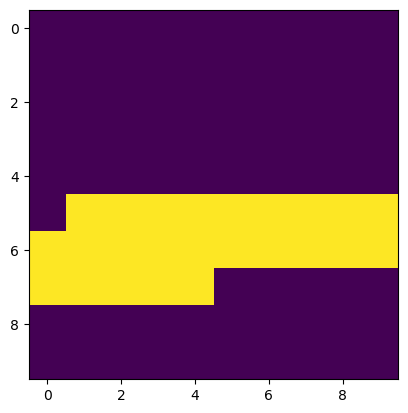

In [88]:
mask = (b[:,:]>50) & (b[:,:]<75)
print(b)
plt.imshow(mask)

[[  0   1   2   3   4   5   6   7   8   9]
 [ 10  11  12  13  14  15  16  17  18  19]
 [ 20  21  22  23  24  25  26  27  28  29]
 [ 30  31  32  33  34  35  36  37  38  39]
 [ 40  41  42  43  44  45  46  47  48  49]
 [ 50 200 200 200 200 200 200 200 200 200]
 [200 200 200 200 200 200 200 200 200 200]
 [200 200 200 200 200 100 100 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]
 [100 100 100 100 100 100 100 100 100 100]]


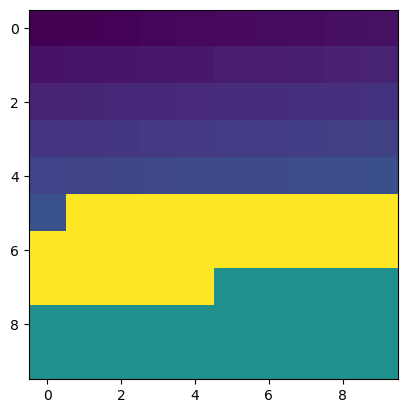

In [89]:
b[mask] = 200
print(b)
plt.imshow(b)

### Masked arrays provide a convenient way to explicitly handle nan values in the same object

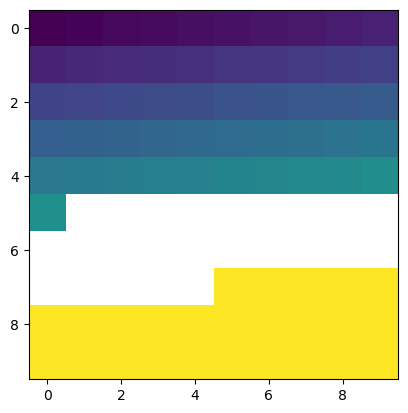

In [90]:
b_masked = np.ma.masked_array(b, mask=mask)
plt.imshow(b_masked)

## Record Arrays

Record arrays, also known as structured arrays, are a great way to store columns of data that have different types.  They can be created by specifying a dtype that defines the columns.  For example:

    dtype=[('x', int), ('y', float), ('z', int)]) 
    
Now, let's use this dtype to create an array with ones in it.

In [91]:
dtype=[('x', int), ('y', float), ('z', int)]
a = np.ones( (10), dtype=dtype)
print(a)

[(1, 1., 1) (1, 1., 1) (1, 1., 1) (1, 1., 1) (1, 1., 1) (1, 1., 1)
 (1, 1., 1) (1, 1., 1) (1, 1., 1) (1, 1., 1)]


In [92]:
#we can access each column by using the column names
print(a['x'])
print(a['y'])
print(a['z'])

[1 1 1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1 1 1 1 1 1 1 1 1 1]


In [93]:
#we can also change how we view the record array so that we can access columns more easily
a = a.view(np.recarray)
print(a.x)
print(a.y)
print(a.z)

[1 1 1 1 1 1 1 1 1 1]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1 1 1 1 1 1 1 1 1 1]


In [94]:
#to add a column, use vstack!
dt = [('name', 'S15')]
string_column = np.empty((10), dtype=dt).view(np.recarray)
string_column.name = 'text string'

#we can use a merge_arrays function to add a column
import numpy.lib.recfunctions as rfn
b = rfn.merge_arrays((a, string_column), flatten = True, usemask = False)

#we need to convert b to a recarray to access individual columns as before
b = b.view(np.recarray)
print('Now we have appended string_column to a: \n', b)
print('b is of shape: ', b.shape)
print(b.dtype.names)

Now we have appended string_column to a: 
 [(1, 1., 1, b'text string') (1, 1., 1, b'text string')
 (1, 1., 1, b'text string') (1, 1., 1, b'text string')
 (1, 1., 1, b'text string') (1, 1., 1, b'text string')
 (1, 1., 1, b'text string') (1, 1., 1, b'text string')
 (1, 1., 1, b'text string') (1, 1., 1, b'text string')]
b is of shape:  (10,)
('x', 'y', 'z', 'name')


## Testing your Skills

1. Become familiar with recarrays by creating one that has four columns and 100 rows.  In the first column, put an integer that starts at 99 and decreases to 0.  In the second column, put a text string that has 'row n', where n is the actual row value.  In the third column put a random number, and in the fourth column, put your name.


In [95]:
#do the exercise here

## genfromtxt and Record Arrays

genfromtxt can automatically create a record array if the following arguments are provided (dtype=None, names=True).  When these arguments are set this way, genfromtxt will automatically determine the type for each column and will use the first non-commented line of the data file as column labels.  

In the 03_numpy folder, there is a csv file called ahf.csv.  This file contains airborne helicopter measurements of elevation taken at points in the everglades.  This data was downloaded from: http://sofia.usgs.gov/exchange/desmond/desmondelev.html.

In the following cell, we use genfromtxt to load this csv file into a recarray.  The beauty of this is that genfromtxt automatically determines the type of information in each columns and fills the array accordingly.  When this is done correctly, we can access each column in the array using the column text identifier as follows.

Data will be loaded from:  data/numpy/ahf.csv
dypte contains the column information:  [('ID', '<i8'), ('X_UTM', '<f8'), ('Y_UTM', '<f8'), ('ELEV_M', '<f8'), ('QUAD_NAME', '<U15'), ('VEG_FS', '<U18'), ('SUR_METHOD', '<U3'), ('SUR_INFO', '<U20'), ('SUR_FILE', '<U12')]

this is the array:  [(   1, 525705.77, 2951410.9 , 4.87, 'Belle Glade', 'Broadleaf Emergent', 'AHF', 'BE33A26506 20061004Y', 'BE061004.PUB')
 (   2, 525875.53, 2951395.58, 4.39, 'Belle Glade', 'Shrub', 'AHF', 'BE33A26506 20061004Y', 'BE061004.PUB')
 (   3, 526235.55, 2951429.23, 3.73, 'Belle Glade', 'Shrub', 'AHF', 'BE33A26506 20061004Y', 'BE061004.PUB')
 ...
 (2863, 527017.04, 2961403.84, 4.85, 'Pahokee', 'Shrub', 'AHF', 'PA13L26906 20061012Y', 'PA061012.PUB')
 (2864, 526621.4 , 2961398.48, 4.98, 'Pahokee', 'Shrub', 'AHF', 'PA13L26906 20061012Y', 'PA061012.PUB')
 (2865, 526221.09, 2961407.38, 3.07, 'Pahokee', 'Knot Grass', 'AHF', 'PA13L26906 20061012Y', 'PA061012.PUB')]

this is just the column names:  ('ID', 'X_UTM', 'Y_

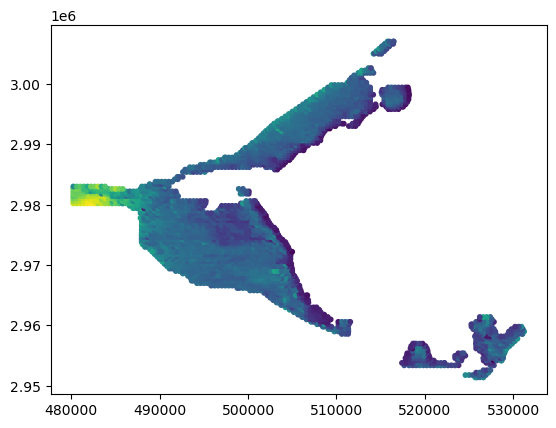

In [96]:
#specify the file name
fname = datapath / 'ahf.csv'
print('Data will be loaded from: ', fname)

#load the array
a = np.genfromtxt(fname, dtype=None, names=True, delimiter=',')

#print information about the array
print('dypte contains the column information: ', a.dtype)
print()
print('this is the array: ', a)
print()
print('this is just the column names: ', a.dtype.names)
print()

#now we can create scatter plot of the points very easily using the plt.scatter command
#the nice thing here is that we access the array columns directly using the column names
plt.scatter(a['X_UTM'], a['Y_UTM'], c=a['ELEV_M'], s=10)

## Reading a Wrapped MODFLOW Array

It is unlikely that there will be time for this, but the following function is a quick hack that can be used to read a MODFLOW external array where the columns are wrapped.  Note that you cannot use `np.genfromtxt` or `np.loadtxt` to do this if the columns are wrapped.

Keep this little function in your back pocket in case you need it one day.  If you have time, read bottom.txt in the 04_numpy directory and plot it.  This array has 142 rows and 113 columns.

In [97]:
# This is a little goodie that you might need one day.
def readarray(fname, nrow, ncol):
    f = open(fname, 'r')
    arraylist = []
    for line in f:
        linelist = line.strip().split()
        for v in linelist:
            dtype = np.int
            if '.' in v:
                dtype = np.float
            arraylist.append(dtype(v))
    f.close()
    return np.reshape(np.array(arraylist[:ncol*nrow]), (nrow, ncol))

In [98]:
#read bottom.txt here

In [99]:
# answer for earlier sk test
dt=[('col1', int), ('col2', 'S10'), ('col3', float), ('col4', 'S20')]
myrecarray = np.zeros((100), dtype=dt).view(np.recarray)
myrecarray.col1[:] = np.arange(99,-1, -1)
myrecarray.col2[:] = 'row '
myrecarray.col3[:] = np.random.random((100))
myrecarray.col4[:] = 'cdl'
print(myrecarray.dtype.names)
print(myrecarray)

('col1', 'col2', 'col3', 'col4')
[(99, b'row ', 0.30958725, b'cdl') (98, b'row ', 0.46935299, b'cdl')
 (97, b'row ', 0.47739591, b'cdl') (96, b'row ', 0.95213506, b'cdl')
 (95, b'row ', 0.265367  , b'cdl') (94, b'row ', 0.04862449, b'cdl')
 (93, b'row ', 0.22926559, b'cdl') (92, b'row ', 0.99442866, b'cdl')
 (91, b'row ', 0.80427364, b'cdl') (90, b'row ', 0.0528968 , b'cdl')
 (89, b'row ', 0.18518017, b'cdl') (88, b'row ', 0.85911426, b'cdl')
 (87, b'row ', 0.81345759, b'cdl') (86, b'row ', 0.98999386, b'cdl')
 (85, b'row ', 0.95424764, b'cdl') (84, b'row ', 0.7055477 , b'cdl')
 (83, b'row ', 0.33211654, b'cdl') (82, b'row ', 0.07453428, b'cdl')
 (81, b'row ', 0.72514719, b'cdl') (80, b'row ', 0.87135438, b'cdl')
 (79, b'row ', 0.57319227, b'cdl') (78, b'row ', 0.60429627, b'cdl')
 (77, b'row ', 0.63890787, b'cdl') (76, b'row ', 0.68159371, b'cdl')
 (75, b'row ', 0.72234997, b'cdl') (74, b'row ', 0.28962971, b'cdl')
 (73, b'row ', 0.09302033, b'cdl') (72, b'row ', 0.71908063, b'cdl')
 

## Flow around a cylinder (from Mark Bakker)

The radial and tangential components of the velocity vector $\vec{v}=(v_r,v_\theta)$ for inviscid fluid flow around a cylinder are given by

$\begin{split}
v_r&=U(1-R^2/r^2)\cos(\theta) \qquad r\ge R \\
v_\theta&=-U(1+R^2/r^2)\sin(\theta) \qquad r\ge R
\end{split}$

and is zero otherwise. The $x$ and $y$ components of the velocity vector may be obtained from the radial and tangential components as

$\begin{split}
v_x&=v_r\cos(\theta) - v_\theta\sin(\theta) \\
v_y &= v_r\sin(\theta) + v_\theta\cos(\theta) 
\end{split}$

1. Write a function that returns the $x$ and $y$ components of the velocity vector for fluid flow around a cylinder with $R=1.5$ and $U=2$.

2. Test your function by making sure that at $(x,y) = (2,3)$ the velocity vector is $(v_x,v_y)=(2.1331, -0.3195)$.

3. Compute the $x$ and $y$ components of the velocity vector on a grid of 50 by 50 points where `x` varies from -4 to +4, and `y` varies from -3 to 3. 

4. Plot the `vx` and `vy` arrays using `plt.imshow`.

5. Create a stream plot using the cool function `plt.streamplot`, which takes four arguments: `x`, `y`, `vx`, `vy`.


## 1D Solute Transport

A simple 1D transport analytical solution (Zheng and Bennet page 174; originally from Ogata and Banks, 1961):

$\frac{C}{C_0} = \frac{1}{2} \left [ erfc \left ( \frac{x - v t}{\sqrt{4Dt}} \right ) + exp \left ( \frac{xv}{D} \right ) erfc \left ( \frac{x + v t}{\sqrt{4Dt}} \right )  \right ]$

Make a plot of solute concentration as a function of distance and also as a function of time for different values of velocity and dispersion coefficient.